In [1]:
import tensorflow as tf
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "1" # 할당된 gpu 번호
#config = tf.compat.v1.ConfigProto()
#config.gpu_options.per_process_gpu_memory_fraction = 0.99
#session = tf.compat.v1.Session(config=config)
import json
def load_json(fname):
    with open(fname) as f:
        json_obj = json.load(f)

    return json_obj
train = load_json("train.json")
val = load_json("val.json")
test = load_json("test.json")
# for i in range(len(val)):
#     train.append(val[i])
data = train+val+test
s = []
t =[]
play_ = []
for i in range(len(data)):
    t.append(data[i]["tags"])
    s.append(data[i]["songs"])
    play_.append(data[i]["plylst_title"])
    
tags = []
for i in t:
    abc = []
    for j in i:
        abc.append(str(j))  
    tags.append(abc)
songs = []
for i in s:
    abc = []
    for j in i:
        abc.append(str(j))  
    songs.append(abc)
title = []
for i in play_:
    abc = []
    for j in i:
        abc.append(str(j))  
    title.append(abc)

tags_ = [' '.join(sentence) for sentence in tags]
songs_ = [' '.join(sentence) for sentence in songs]
title_ = [' '.join(sentence) for sentence in title]


from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(token_pattern=u"(?u)\\b\\w+\\b", min_df=2)
vect.fit(tags_)
len(vect.vocabulary_)

vect_s = CountVectorizer(token_pattern=u"(?u)\\b\\w+\\b",min_df=4)
vect_s.fit(songs_)
len(vect_s.vocabulary_)

vect_ti = CountVectorizer(token_pattern=u"(?u)\\b\\w+\\b",min_df=5)
vect_ti.fit(title_)
len(vect_ti.vocabulary_)

train_  = vect.transform(tags_)
train_s  = vect_s.transform(songs_)
train_ti  = vect_ti.transform(title_)

/home/yjkim/anaconda3/envs/allml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/yjkim/anaconda3/envs/allml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/yjkim/anaconda3/envs/allml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/yjkim/anaconda3/envs/allml/lib/python3.7/site-

In [2]:
song_meta= load_json("song_meta.json")

genre_meta = load_json("genre_gn_all.json")

In [3]:
song_basket = []
for i in songs:
    basket = []
    for j in i:
        basket.append(int(j))
    song_basket.append(basket)
artist_basket=[]
for  i in songs:
    poo=[]
    for  j in i:
        poo.append(int(j))
    artist_basket.append(poo)

In [4]:
def get_genre_cross_playlist(tr_songs, song_meta):
    genre_cross_playlist = []
    for playlist in tr_songs:
        genre = []
        #print(playlist)
        for song in playlist:
            #genre.append(song)
            genre.extend(song_meta[song]["artist_name_basket"])
        genre_cross_playlist.append(genre)
    return genre_cross_playlist

b = get_genre_cross_playlist(artist_basket,song_meta)

In [5]:
artist_ = [' '.join(sentence) for sentence in b]
vect_artist = CountVectorizer(token_pattern=u"(?u)\\b\\w+\\b",min_df=3)
vect_artist.fit(artist_)
len(vect_artist.vocabulary_)
train_artist  = vect_artist.transform(artist_)

In [6]:
train_artist

<148826x48164 sparse matrix of type '<class 'numpy.int64'>'
	with 6812635 stored elements in Compressed Sparse Row format>

In [7]:
import random
import copy
def denoising(songs):
    a= []
    d = 1
    for _list in songs:
        sample_list = []
        if len(_list) < 9:
            a.append(_list)
            d
            continue
        for i in range(1):
            new_list = copy.deepcopy(_list)
            for i in range(int(len(new_list) *0.3)):
                new_list.remove(random.choice(new_list))
            a.append(new_list)
    return a

In [8]:
ttags = denoising(tags)
ssongs = denoising(songs)
len(b)

148826

In [9]:
tags__ = [' '.join(sentence) for sentence in ttags]
songs__ = [' '.join(sentence) for sentence in ssongs]
#title__ = [' '.join(sentence) for sentence in aartist]

train_d  = vect.transform(tags__)
train_s_d  = vect_s.transform(songs__)
#train_artist_d  = vect_artist.transform(title__)

In [10]:
len(vect.vocabulary_),len(vect_s.vocabulary_),len(vect_ti.vocabulary_)

(12381, 187516, 1393)

In [11]:
import scipy
from scipy.sparse import csr_matrix
r = scipy.sparse.hstack([train_s_d,train_d])
r = csr_matrix(r)
r

<148826x199897 sparse matrix of type '<class 'numpy.int64'>'
	with 4178615 stored elements in Compressed Sparse Row format>

In [12]:
r_y = scipy.sparse.hstack([train_s,train_])
r_y = csr_matrix(r_y)
r_y

<148826x199897 sparse matrix of type '<class 'numpy.int64'>'
	with 5740773 stored elements in Compressed Sparse Row format>

In [13]:
r,r_y,train_artist

(<148826x199897 sparse matrix of type '<class 'numpy.int64'>'
 	with 4178615 stored elements in Compressed Sparse Row format>,
 <148826x199897 sparse matrix of type '<class 'numpy.int64'>'
 	with 5740773 stored elements in Compressed Sparse Row format>,
 <148826x48164 sparse matrix of type '<class 'numpy.int64'>'
 	with 6812635 stored elements in Compressed Sparse Row format>)

In [14]:
(train_d,train_s_d),(train_,train_s),train_artist

((<148826x12381 sparse matrix of type '<class 'numpy.int64'>'
  	with 450884 stored elements in Compressed Sparse Row format>,
  <148826x187516 sparse matrix of type '<class 'numpy.int64'>'
  	with 3727731 stored elements in Compressed Sparse Row format>),
 (<148826x12381 sparse matrix of type '<class 'numpy.int64'>'
  	with 498134 stored elements in Compressed Sparse Row format>,
  <148826x187516 sparse matrix of type '<class 'numpy.int64'>'
  	with 5242639 stored elements in Compressed Sparse Row format>),
 <148826x48164 sparse matrix of type '<class 'numpy.int64'>'
 	with 6812635 stored elements in Compressed Sparse Row format>)

In [15]:
from keras.optimizers import Adam
from keras.layers import Input, Dense, Dropout, Embedding, Flatten, add,Concatenate
from keras.models import Model

def autoEncoder(X):
    '''
    Autoencoder for Collaborative Filter Model
    '''
    users_items_matrix= X
    #print(users_items_matrix.shape,content_info.shape)
    
    # Input
    input_layer   = Input(shape=(users_items_matrix.shape[1],), name='UserScore')
    #input_content = Input(shape=(content_info.shape[1],), name='Itemcontent')
    
    # Encoder
    # -----------------------------
    enc = Dense(256, activation='sigmoid', name='EncLayer1',bias_initializer='zeros',kernel_initializer='glorot_uniform')(input_layer)

    # Content Information
    #x_content = Embedding(48165, 50, input_length=content_info.shape[1])(input_content)
    #x_content = Flatten()(x_content)
    #x_content = Dense(128, activation='selu', 
    #                           name='ItemLatentSpace')(x_content)
    # Latent Space
    # -----------------------------
    #lat_space = Dense(256, activation='sigmoid', name='UserLatentSpace')(enc)
    
    #lat_space= Concatenate(name='LatentSpace')([enc, x_content])
    lat_space = Dropout(0.25, name='Dropout')(enc) # Dropout

    # Decoder
    # -----------------------------
    dec = Dense(256, activation='sigmoid', name='DecLayer1')(lat_space)

    # Output
    output_layer = Dense(users_items_matrix.shape[1], activation='sigmoid', name='UserScorePred',bias_initializer='zeros',kernel_initializer='glorot_uniform')(dec)

    # this model maps an input to its reconstruction
    model = Model(input_layer, output_layer)    
    
    return model

Using TensorFlow backend.


In [16]:
from keras.utils import multi_gpu_model
# Build model
X = r
model = autoEncoder(X)
#model = multi_gpu_model(model, gpus=2)
#model = multi_gpu_model(model, gpus=2)
model.compile(optimizer = Adam(lr=0.01), loss='binary_crossentropy')
    
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
UserScore (InputLayer)       (None, 199897)            0         
_________________________________________________________________
EncLayer1 (Dense)            (None, 256)               51173888  
_________________________________________________________________
Dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
DecLayer1 (Dense)            (None, 256)               65792     
_________________________________________________________________
UserScorePred (Dense)        (None, 199897)            51373529  
Total params: 102,613,209
Trainable params: 102,613,209
Non-trainable params: 0
_________________________________________________________________


In [55]:
train_artist,len(train),len(val),len(test),len(train)+len(val)+len(test)

(<148826x48164 sparse matrix of type '<class 'numpy.int64'>'
 	with 6812635 stored elements in Compressed Sparse Row format>,
 115071,
 23015,
 10740,
 148826)

In [60]:
val_artist = train_artist[115071:115071+23015]

In [17]:
val_r_y=r_y[115071:115071+23015]
val_r_x=r[115071:115071+23015]
r_y,r,val_r_y,val_r_x

(<148826x199897 sparse matrix of type '<class 'numpy.int64'>'
 	with 5740773 stored elements in Compressed Sparse Row format>,
 <148826x199897 sparse matrix of type '<class 'numpy.int64'>'
 	with 4178615 stored elements in Compressed Sparse Row format>,
 <23015x199897 sparse matrix of type '<class 'numpy.int64'>'
 	with 400286 stored elements in Compressed Sparse Row format>,
 <23015x199897 sparse matrix of type '<class 'numpy.int64'>'
 	with 298913 stored elements in Compressed Sparse Row format>)

In [18]:
r,r_y,val_r_x,val_r_y

(<148826x199897 sparse matrix of type '<class 'numpy.int64'>'
 	with 4178615 stored elements in Compressed Sparse Row format>,
 <148826x199897 sparse matrix of type '<class 'numpy.int64'>'
 	with 5740773 stored elements in Compressed Sparse Row format>,
 <23015x199897 sparse matrix of type '<class 'numpy.int64'>'
 	with 298913 stored elements in Compressed Sparse Row format>,
 <23015x199897 sparse matrix of type '<class 'numpy.int64'>'
 	with 400286 stored elements in Compressed Sparse Row format>)

In [19]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
MODEL_SAVE_FOLDER_PATH = '/home/yjkim/new_melon_test/youngwook-melon/res/cmf/auto1/'
if not os.path.exists(MODEL_SAVE_FOLDER_PATH):
  os.mkdir(MODEL_SAVE_FOLDER_PATH)

model_path = MODEL_SAVE_FOLDER_PATH + '{epoch:02d}-{val_loss:.5f}.hdf5'

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss',
                                verbose=1, save_best_only=True)
hist = model.fit(x=r, y=r_y,
                 validation_data=(val_r_x, val_r_y),
                  epochs=30,
                  batch_size=32,
                  shuffle=True,
                  callbacks=[cb_checkpoint])

Instructions for updating:
Use tf.cast instead.
Train on 148826 samples, validate on 23015 samples
Epoch 1/30
148826/148826 [==============================] - 349s 2ms/step - loss: 0.0021 - val_loss: 8.9559e-04

Epoch 00001: val_loss improved from inf to 0.00090, saving model to /home/yjkim/new_melon_test/youngwook-melon/res/cmf/auto1/01-0.00090.hdf5
Epoch 2/30
148826/148826 [==============================] - 334s 2ms/step - loss: 0.0017 - val_loss: 8.9511e-04

Epoch 00002: val_loss improved from 0.00090 to 0.00090, saving model to /home/yjkim/new_melon_test/youngwook-melon/res/cmf/auto1/02-0.00090.hdf5
Epoch 3/30
148826/148826 [==============================] - 312s 2ms/step - loss: 0.0017 - val_loss: 8.9195e-04

Epoch 00003: val_loss improved from 0.00090 to 0.00089, saving model to /home/yjkim/new_melon_test/youngwook-melon/res/cmf/auto1/03-0.00089.hdf5
Epoch 4/30
148826/148826 [==============================] - 309s 2ms/step - loss: 0.0017 - val_loss: 8.9587e-04

Epoch 00004: val_l

In [20]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
MODEL_SAVE_FOLDER_PATH = '/home/yjkim/new_melon_test/youngwook-melon/res/cmf/auto1/'
if not os.path.exists(MODEL_SAVE_FOLDER_PATH):
  os.mkdir(MODEL_SAVE_FOLDER_PATH)

model_path = MODEL_SAVE_FOLDER_PATH + '{epoch:02d}-{val_loss:.6f}.hdf5'

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss',
                                verbose=1, save_best_only=True)
hist1 = model.fit(x=r, y=r_y,
                 validation_data=(val_r_x, val_r_y),
                  epochs=10,
                  batch_size=32,
                  shuffle=True,
                  callbacks=[cb_checkpoint])

Train on 148826 samples, validate on 23015 samples
Epoch 1/10
148826/148826 [==============================] - 307s 2ms/step - loss: 7.4921e-04 - val_loss: 3.5359e-04

Epoch 00001: val_loss improved from inf to 0.00035, saving model to /home/yjkim/new_melon_test/youngwook-melon/res/cmf/auto1/01-0.000354.hdf5
Epoch 2/10
148826/148826 [==============================] - 309s 2ms/step - loss: 7.3509e-04 - val_loss: 3.4358e-04

Epoch 00002: val_loss improved from 0.00035 to 0.00034, saving model to /home/yjkim/new_melon_test/youngwook-melon/res/cmf/auto1/02-0.000344.hdf5
Epoch 3/10
148826/148826 [==============================] - 308s 2ms/step - loss: 7.2197e-04 - val_loss: 3.3515e-04

Epoch 00003: val_loss improved from 0.00034 to 0.00034, saving model to /home/yjkim/new_melon_test/youngwook-melon/res/cmf/auto1/03-0.000335.hdf5
Epoch 4/10
148826/148826 [==============================] - 309s 2ms/step - loss: 7.0956e-04 - val_loss: 3.2701e-04

Epoch 00004: val_loss improved from 0.00034 to 

In [ ]:
# from keras.callbacks import EarlyStopping, ModelCheckpoint
# MODEL_SAVE_FOLDER_PATH = '/home/yjkim/new_melon_test/youngwook-melon/res/cmf/auto1/'
# if not os.path.exists(MODEL_SAVE_FOLDER_PATH):
#   os.mkdir(MODEL_SAVE_FOLDER_PATH)

model_path = MODEL_SAVE_FOLDER_PATH + '{epoch:02d}-{val_loss:.7f}.hdf5'

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss',
                                verbose=1, save_best_only=True)
hist2 = model.fit(x=r, y=r_y,
                 validation_data=(val_r_x, val_r_y),
                  epochs=10,
                  batch_size=32,
                  shuffle=True,
                  callbacks=[cb_checkpoint])

Train on 148826 samples, validate on 23015 samples
Epoch 1/10
148826/148826 [==============================] - 309s 2ms/step - loss: 6.4192e-04 - val_loss: 2.8060e-04

Epoch 00001: val_loss improved from inf to 0.00028, saving model to /home/yjkim/new_melon_test/youngwook-melon/res/cmf/auto1/01-0.0002806.hdf5
Epoch 2/10
148826/148826 [==============================] - 311s 2ms/step - loss: 6.3390e-04 - val_loss: 2.7525e-04

Epoch 00002: val_loss improved from 0.00028 to 0.00028, saving model to /home/yjkim/new_melon_test/youngwook-melon/res/cmf/auto1/02-0.0002753.hdf5
Epoch 3/10
148826/148826 [==============================] - 309s 2ms/step - loss: 6.2645e-04 - val_loss: 2.6896e-04

Epoch 00003: val_loss improved from 0.00028 to 0.00027, saving model to /home/yjkim/new_melon_test/youngwook-melon/res/cmf/auto1/03-0.0002690.hdf5
Epoch 4/10
148826/148826 [==============================] - 310s 2ms/step - loss: 6.1915e-04 - val_loss: 2.6417e-04

Epoch 00004: val_loss improved from 0.00027 

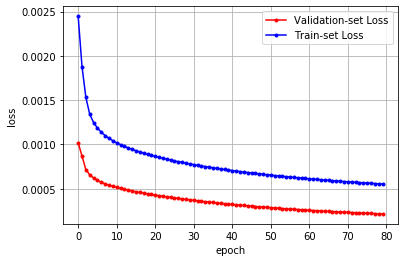

In [62]:
import numpy
%matplotlib inline
import matplotlib.pyplot as plt

y_vloss = hist.history['val_loss']
y_loss = hist.history['loss']

x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [36]:
model.load_weights("/home/yjkim/yj_melon/test/Recommenders/reco_utils/recommender/ncf/movie/newcount/64-0.0006.hdf5")

OSError: Unable to open file (unable to open file: name = '/home/yjkim/yj_melon/test/Recommenders/reco_utils/recommender/ncf/movie/newcount/64-0.0006.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
val
t_val = []
s_val = []
play_val = []
for i in range(len(val)):
    t_val.append(val[i]["tags"])
    s_val.append(val[i]["songs"])
    play_val.append(val[i]["plylst_title"])

songs_val = []
for i in s_val:
    abc = []
    for j in i:
        abc.append(str(j))  
    songs_val.append(abc)

In [26]:
songs_v = [' '.join(sentence) for sentence in songs_val]

In [27]:
train_s_val_data  = vect_s.transform(songs_v)

In [28]:
train_s_val_data

<23015x156348 sparse matrix of type '<class 'numpy.int64'>'
	with 365022 stored elements in Compressed Sparse Row format>

In [ ]:
import random
import copy
a= []
d = 1
for _list in songs:
    sample_list = []
    if len(_list) < 9:
        a.append(_list)
        d
        continue
    for i in range(1):
        new_list = copy.deepcopy(_list)
        for i in range(int(len(new_list) *0.3)):
            new_list.remove(random.choice(new_list))
        a.append(new_list)

In [52]:
val_data_y_,val_data_x_

(<23015x156348 sparse matrix of type '<class 'numpy.int64'>'
 	with 365022 stored elements in Compressed Sparse Row format>,
 <23015x156348 sparse matrix of type '<class 'numpy.int64'>'
 	with 266101 stored elements in Compressed Sparse Row format>)

In [29]:
tname = vect.get_feature_names
def recommender_for_user(user_id, interact_matrix,  topn = 10):

    pred_scores = interact_matrix.loc[user_id].values
    #print(pred_scores,len(pred_scores),df.columns[57061:],len(df.columns[57061:]))
    df_scores   = pd.DataFrame({'content_id': tname, 
                               'score': pred_scores})

    df_rec      = df_scores.set_index('content_id')\
                    .sort_values('score', ascending=False)\
                    .head(topn)[["score"]]
    return df_rec[df_rec.score > 0]
fname = vect_s.get_feature_names()
def recommender_for_user_s(user_id, interact_matrix,  topn = 100):
    
    pred_scores = interact_matrix.loc[user_id].values
    #print(pred_scores)
    #print(list(song_predict)[0:10])
    df_scores   = pd.DataFrame({'content_id': fname, 
                               'score': pred_scores})

    df_rec      = df_scores.set_index('content_id')\
                    .sort_values('score', ascending=False)\
                    .head(topn)[["score"]]
    return df_rec[df_rec.score > 0]
def select_top_n(names, scores, topn):
    #return sorted(enumerate(names), key=lambda item: scores[item[0]], reverse=True)
    return list(zip(*sorted(enumerate(names), key=lambda item: scores[item[0]], reverse=True)[:topn]))[1]

In [30]:
import copy
val_copy = copy.deepcopy(val)

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
for i,check in tqdm(enumerate(model.predict(val_data_y_))):
    new_matrix = (val_data_y_[i].toarray()==0)*(check - np.min(check))
    #val_copy[i]["songs"] = select_top_n(names = fname, scores=new_matrix[0,:], topn=100)
    
    
    song_predict = pd.DataFrame(new_matrix[:,:])
    #print("Model prediction00: {}s".format(time.time() - start_time))
    #start_time = time.time()

    song_predict.columns=fname
    #print("Model prediction01: {}s".format(time.time() - start_time))
    #start_time = time.time()


    #print("Model prediction2: {}s".format(time.time() - start_time))
    #start_time = time.time()

    #tags_predict = pd.DataFrame(new_matrix[:,615142:])
    #tags_predict.columns=vect.get_feature_names()
    #print(recommender_for_user(user_id = i, interact_matrix = df)["score"].index.tolist())
    #print(val_[i]["songs"])
    #val[i]["tags"] = recommender_for_user(user_id = 0, interact_matrix = tags_predict)["score"].index.tolist()
    val_copy[i]["songs"] = recommender_for_user_s(user_id = 0, interact_matrix = song_predict)["score"].index.tolist()
#     print("Model prediction3: {}s".format(time.time() - start_time))
#     start_time = time.time()

#     print(val[i]["songs"] == top_songs, top_songs)

5423it [18:24,  5.07it/s]

In [121]:
val_copy[3]

{'tags': [],
 'id': 45144,
 'plylst_title': '',
 'songs': ['152422',
  '643628',
  '610933',
  '224921',
  '205179',
  '215411',
  '427724',
  '209135',
  '497066',
  '463173',
  '627363',
  '485155',
  '680366',
  '116573',
  '424813',
  '449244',
  '11657',
  '366786',
  '357367',
  '645489',
  '90557',
  '349492',
  '547967',
  '523521',
  '396828',
  '675115',
  '235773',
  '663256',
  '668128',
  '174749',
  '674160',
  '422077',
  '648628',
  '169984',
  '672550',
  '531820',
  '154858',
  '520093',
  '654757',
  '207558',
  '407828',
  '701557',
  '153271',
  '187047',
  '42155',
  '442014',
  '19811',
  '144663',
  '582252',
  '581799',
  '554751',
  '44603',
  '117595',
  '464051',
  '339802',
  '486705',
  '300087',
  '350309',
  '518420',
  '253755',
  '133143',
  '246531',
  '209993',
  '448116',
  '15124',
  '307896',
  '295250',
  '553171',
  '177460',
  '6546',
  '571016',
  '76888',
  '118219',
  '202564',
  '653733',
  '678762',
  '625875',
  '626369',
  '422915',
  '3

In [32]:
val_copy[3]

{'tags': [],
 'id': 45144,
 'plylst_title': '',
 'songs': ['288763',
  '618392',
  '396828',
  '284992',
  '351888',
  '442014',
  '668720',
  '348398',
  '661449',
  '198487',
  '522350',
  '70185',
  '491536',
  '105140',
  '624827',
  '4185',
  '549392',
  '672541',
  '349492',
  '199262',
  '479944',
  '404524',
  '451359',
  '586684',
  '131701',
  '367963',
  '10961',
  '625254',
  '622923',
  '305045',
  '509998',
  '106017',
  '442543',
  '71727',
  '453718',
  '123485',
  '205247',
  '663492',
  '61170',
  '683085',
  '324779',
  '289121',
  '297924',
  '174749',
  '113664',
  '29035',
  '64930',
  '41404',
  '513756',
  '642555',
  '662914',
  '214494',
  '87722',
  '215132',
  '218839',
  '49147',
  '102980',
  '527296',
  '384299',
  '28788',
  '24257',
  '388675',
  '210',
  '701323',
  '333232',
  '422915',
  '56352',
  '331958',
  '535399',
  '498219',
  '495890',
  '482716',
  '582252',
  '61159',
  '443425',
  '253425',
  '345321',
  '241002',
  '325233',
  '21725',
  

In [33]:
import json
def load_json(fname):
    with open(fname, encoding="UTF-8") as f:
        json_obj = json.load(f)

    return json_obj


#dap2 = load_json("2.json")
dap50 = load_json("dab.json")

In [34]:
for i in range(len(dap50)):
    dap50[i]["songs"] = val_copy[i]["songs"]
    
for i in range(len(dap50)):
    for j in range(len(dap50[i]["songs"])):
        dap50[i]["songs"][j] = int(dap50[i]["songs"][j])
        
        
with open("resu_t.json", "w") as outfile:
        json.dump(dap50, outfile, ensure_ascii=False, indent=4)

In [102]:
dap50[3]

{'id': 45144,
 'songs': [144663,
  367963,
  174749,
  357367,
  171798,
  497066,
  697100,
  116573,
  295250,
  418935,
  610933,
  224921,
  245317,
  446812,
  178044,
  553171,
  440160,
  6546,
  246531,
  576186,
  224609,
  531820,
  281838,
  10961,
  608260,
  377243,
  45476,
  449244,
  623725,
  77951,
  668763,
  232874,
  586653,
  67655,
  478754,
  210647,
  112153,
  423649,
  532347,
  305045,
  185174,
  283138,
  19533,
  102980,
  244565,
  322491,
  495830,
  122363,
  165281,
  398805,
  582252,
  516653,
  234921,
  553786,
  182201,
  366786,
  562482,
  333070,
  284992,
  339802,
  384059,
  27469,
  343974,
  283780,
  125822,
  482716,
  37748,
  234999,
  278995,
  532114,
  443902,
  627363,
  321643,
  43471,
  707724,
  334539,
  519391,
  611737,
  140130,
  594592,
  564336,
  567650,
  13281,
  298103,
  701557,
  286273,
  549392,
  50428,
  486705,
  17107,
  166841,
  581789,
  98472,
  505036,
  509998,
  307896,
  351888,
  596663,
  450661,
 

In [5]:
len(songs[0])

19

In [6]:
len(a[0])

14

In [10]:
train_s[1]

<1x156348 sparse matrix of type '<class 'numpy.int64'>'
	with 38 stored elements in Compressed Sparse Row format>

In [35]:
len(train[0]["songs"])

19

In [ ]:
1

In [ ]:
1